# Hold'em Assist

The notebook serves as a guide through a single hand during a game of Texas Hold'em. It will not provide recommendations to call, check, raise, or fold. Rather it returns the probability of winning given the cards that are currently dealt to the player.

## Usage:

First run the config and import blocks.
At the beginning of each hand start running the block that defines the new game as ng.

Enter all cards with a syntax like:

```
'Ah' = Ace of hearts
'Qc' = Queen of clubs
'Ts' = Ten of Spades
'9d' = Nine of Diamonds
```

After entering in the cards, run the blocks under as well to compute the results

In [1]:
import pyximport; pyximport.install()
# Jupyter Config
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#import warnings
#warnings.filterwarnings('ignore')

In [2]:
# Imports
from deuces import Card
from deuces import Deck
from deuces import Evaluator
from thread_game import Game
import pandas as pd
import numpy as np
import seaborn as sns
# Defines plot palette 
sns.set(style="ticks", palette="pastel")

## Start Hand

In [3]:
# Run this for a new hand
ng = Game()
ng.set_player_cards("Ad","4c")

In [6]:
# Number of people at table
ng.table_size = 6
ng.iterations = 10

In [7]:
%%time
# Run this pre-flop
rates = ng.play_hands()
#ng.print_win_rate()
#df = pd.Series(rates['stat_win_rates'])
#
df = pd.Series(rates)
#print("Hand: ")
Card.print_pretty_cards(ng.player_hand)
#print(df.describe())
print(df.median())
#df.hist(normed=True)
df.plot.hist(weights=(np.ones_like(df.index) / len(df.index))*100.0)
#sns.distplot(df, hist=True, kde_kws={"shade": True})

OSError: [Errno 24] Too many open files

## The Flop

In [9]:
# Input the flop:
board = ['2d','3d','5d']
for card in board:
    ng.board.append(Card.new(card))


25.0
  [ 6 ♣ ] , [ Q ❤ ]  
Board is: 
  [ 2 ♦ ] , [ 3 ♦ ] , [ 5 ♦ ]  
CPU times: user 1.53 s, sys: 3.14 s, total: 4.67 s
Wall time: 6.66 s


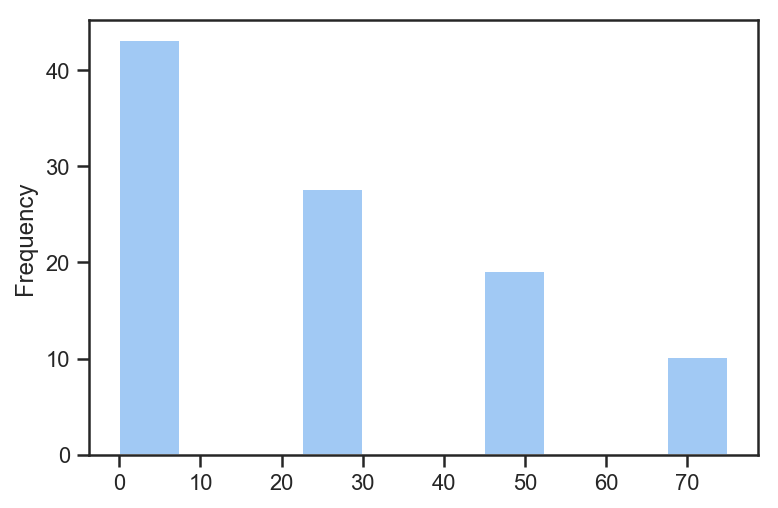

In [10]:
%%time
# Run to compute odds after flop:
ng.table_size = 3
rates = ng.play_hands()
#ng.print_win_rate()
df = pd.Series(rates)
print(df.median())
#df.hist()
df.plot.hist(weights=(np.ones_like(df.index) / len(df.index))*100.0)
Card.print_pretty_cards(ng.player_hand)
print("Board is: ")
Card.print_pretty_cards(ng.board)

## The Turn

In [11]:
# Add the turn card:
ng.board.append(Card.new('8d'))


0.0
  [ 6 ♣ ] , [ Q ❤ ]  
Board is: 
  [ 2 ♦ ] , [ 3 ♦ ] , [ 5 ♦ ] , [ 8 ♦ ]  
CPU times: user 1.52 s, sys: 3.11 s, total: 4.63 s
Wall time: 6.65 s


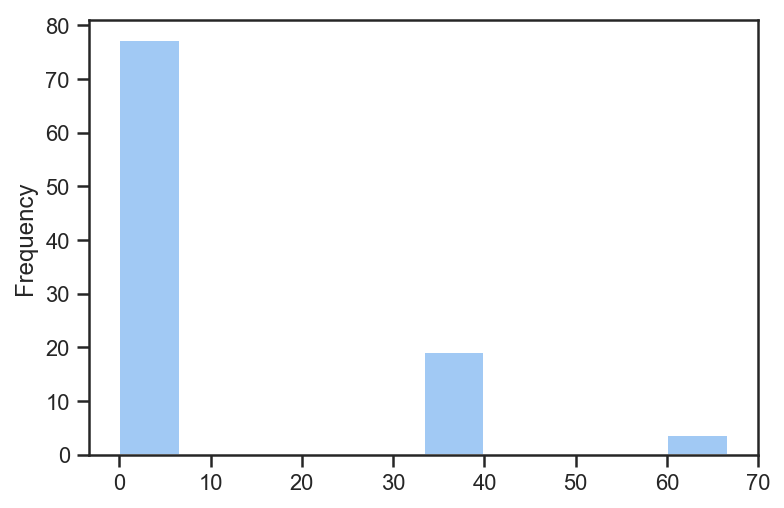

In [12]:
%%time
# Run to compute odds after turn:
ng.table_size = 3
rates = ng.play_hands()
#ng.print_win_rate()
df = pd.Series(rates)
print(df.median())
df.plot.hist(weights=(np.ones_like(df.index) / len(df.index))*100.0)
Card.print_pretty_cards(ng.player_hand)
print("Board is: ")
Card.print_pretty_cards(ng.board)

## The River

In [ ]:
# Add the river card:
ng.board.append(Card.new('Td'))


In [ ]:
%%time
# Run to compute odds after river:
ng.table_size = 3
rates = ng.play_hands()
#ng.print_win_rate()
df = pd.Series(rates)
print(df.median())
df.plot.hist(weights=(np.ones_like(df.index) / len(df.index))*100.0)
Card.print_pretty_cards(ng.player_hand)
print("Board is: ")
Card.print_pretty_cards(ng.board)

In [ ]:
from deuces import Evaluator

In [ ]:
%%time
hand = [Card.new('Ac'), Card.new('As')]
board = [Card.new('5c'), Card.new('8s'), Card.new('9h')]
evaluator = Evaluator()
p1_eval = evaluator.evaluate(board, hand)